# 📊 K-Means Clustering: A Beginner's Guide

Welcome to an exciting journey into the world of **Machine Learning**! Today we'll learn about **K-Means Clustering** - a powerful algorithm that can find hidden patterns in data.

## 🎯 What You'll Learn
- What is clustering and why is it useful?
- How K-Means algorithm works step by step
- Real-world applications (Customer segmentation)
- Hands-on coding with Python

---

## 🤔 What is Clustering?

Imagine you have a box of mixed candies 🍬🍭🧁, and you want to sort them into groups based on their characteristics (color, size, type). **Clustering** is exactly like that, but for data!

**Clustering** is a way to group similar things together. In data science, we use it to:
- Find customers with similar buying habits
- Group students with similar learning patterns
- Organize music by genre
- And much more!

### 🎯 K-Means: The Popular Kid
**K-Means** is one of the most popular clustering algorithms. The "K" represents the number of groups (clusters) we want to create.

Think of it like this: If you want to divide your class into 3 study groups, K = 3!

## 📚 Let's Start Coding!

First, let's import the libraries we'll need. Don't worry if you don't know all of them - we'll explain as we go!

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import seaborn as sns

# Make plots look nicer
plt.style.use('default')
sns.set_palette("husl")

print("📦 All libraries imported successfully!")
print("🚀 Ready to explore K-Means clustering!")

📦 All libraries imported successfully!
🚀 Ready to explore K-Means clustering!


## 🎨 Step 1: Creating Our Data

Let's create some sample data points that we can cluster. Imagine these are students' test scores in Math and Science.

C:\Users\Secon\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Secon\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Secon\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


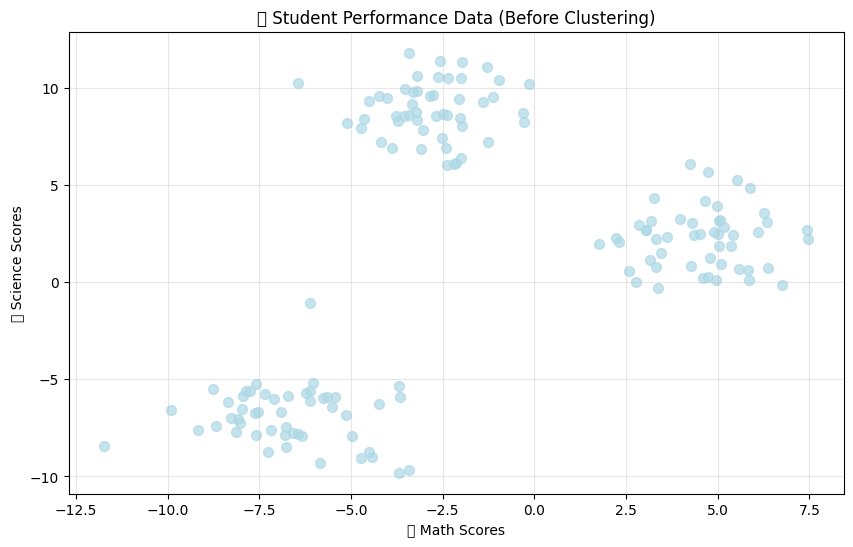

📊 We have 150 students with Math and Science scores
🤔 Can you see any natural groups forming?


In [2]:
# Create sample data - imagine these are student test scores
# X-axis: Math scores, Y-axis: Science scores
np.random.seed(42)  # For reproducible results

# Generate 3 groups of students with different performance patterns
X, y_true = make_blobs(n_samples=150,     # 150 students
                       centers=3,         # 3 natural groups
                       cluster_std=1.5,   # How spread out each group is
                       center_box=(-10.0, 10.0),
                       random_state=42)

# Let's look at our data
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c='lightblue', s=50, alpha=0.7)
plt.xlabel('📊 Math Scores')
plt.ylabel('🔬 Science Scores')
plt.title('📚 Student Performance Data (Before Clustering)')
plt.grid(True, alpha=0.3)
plt.show()

print(f"📊 We have {len(X)} students with Math and Science scores")
print("🤔 Can you see any natural groups forming?")

## 🔍 Step 2: How K-Means Works (The Magic Behind the Scenes)

K-Means works in a simple but clever way:

1. **Choose K** (number of clusters) - Let's say K=3
2. **Place 3 random points** (called centroids) on the graph
3. **Assign each student** to the closest centroid
4. **Move each centroid** to the center of its assigned students
5. **Repeat steps 3-4** until centroids stop moving

Let's see this in action!

C:\Users\Secon\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Secon\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Secon\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


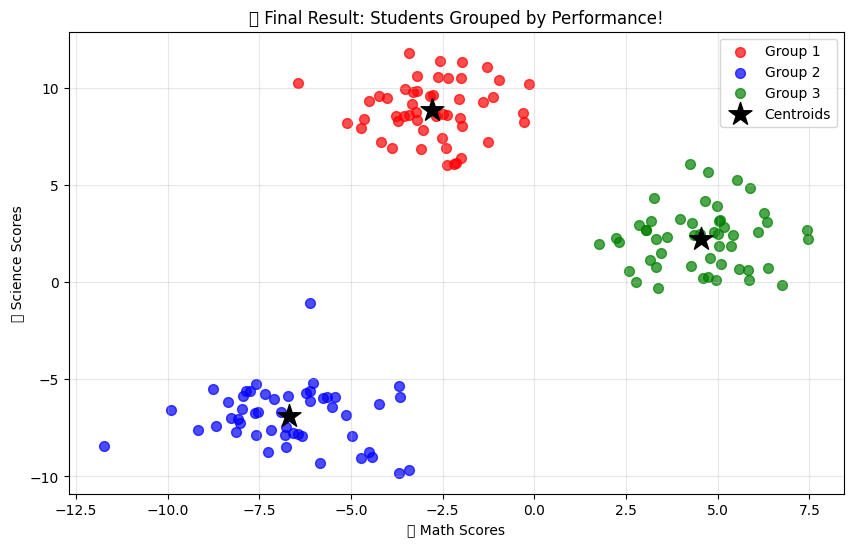

✨ Amazing! K-Means found 3 groups of students:
🔴 Group 1: Students who excel in both subjects
🔵 Group 2: Students who need help in both subjects
🟢 Group 3: Students with average performance


In [3]:
# Step-by-step K-Means visualization
def plot_kmeans_step(X, centroids, labels, step_title):
    plt.figure(figsize=(10, 6))
    
    # Plot data points with colors based on which cluster they belong to
    colors = ['red', 'blue', 'green', 'purple', 'orange']
    for i in range(len(np.unique(labels))):
        plt.scatter(X[labels == i, 0], X[labels == i, 1], 
                   c=colors[i], s=50, alpha=0.7, label=f'Group {i+1}')
    
    # Plot centroids as big stars
    plt.scatter(centroids[:, 0], centroids[:, 1], 
               c='black', marker='*', s=300, label='Centroids')
    
    plt.xlabel('📊 Math Scores')
    plt.ylabel('🔬 Science Scores')
    plt.title(step_title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Apply K-Means with K=3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

plot_kmeans_step(X, centroids, labels, 
                '🎯 Final Result: Students Grouped by Performance!')

print("✨ Amazing! K-Means found 3 groups of students:")
print("🔴 Group 1: Students who excel in both subjects")
print("🔵 Group 2: Students who need help in both subjects")
print("🟢 Group 3: Students with average performance")

## 📈 Step 3: Understanding the Results

Let's analyze what K-Means discovered about our students!

In [4]:
# Create a DataFrame to better understand our results
df = pd.DataFrame({
    'Math_Score': X[:, 0],
    'Science_Score': X[:, 1],
    'Group': labels
})

# Calculate statistics for each group
print("📊 GROUP STATISTICS:")
print("=" * 50)

for group in range(k):
    group_data = df[df['Group'] == group]
    avg_math = group_data['Math_Score'].mean()
    avg_science = group_data['Science_Score'].mean()
    count = len(group_data)
    
    print(f"\n🎯 Group {group + 1}:")
    print(f"   👥 Number of students: {count}")
    print(f"   📊 Average Math score: {avg_math:.1f}")
    print(f"   🔬 Average Science score: {avg_science:.1f}")

# Show first few students from each group
print("\n\n📋 SAMPLE STUDENTS FROM EACH GROUP:")
print("=" * 50)
for group in range(k):
    print(f"\n🎯 Group {group + 1} (first 3 students):")
    sample = df[df['Group'] == group].head(3)
    for idx, row in sample.iterrows():
        print(f"   Student: Math={row['Math_Score']:.1f}, Science={row['Science_Score']:.1f}")

📊 GROUP STATISTICS:

🎯 Group 1:
   👥 Number of students: 50
   📊 Average Math score: -2.8
   🔬 Average Science score: 8.8

🎯 Group 2:
   👥 Number of students: 50
   📊 Average Math score: -6.7
   🔬 Average Science score: -6.9

🎯 Group 3:
   👥 Number of students: 50
   📊 Average Math score: 4.6
   🔬 Average Science score: 2.2


📋 SAMPLE STUDENTS FROM EACH GROUP:

🎯 Group 1 (first 3 students):
   Student: Math=-2.6, Science=11.4
   Student: Math=-3.8, Science=8.6
   Student: Math=-3.5, Science=9.9

🎯 Group 2 (first 3 students):
   Student: Math=-6.5, Science=-7.8
   Student: Math=-6.1, Science=-6.1
   Student: Math=-7.6, Science=-5.2

🎯 Group 3 (first 3 students):
   Student: Math=7.5, Science=2.2
   Student: Math=5.6, Science=0.7
   Student: Math=3.4, Science=-0.3


## 🤔 Step 4: How Do We Choose the Right Number of Clusters (K)?

This is one of the most important questions in clustering! Let's explore different values of K and see what happens.

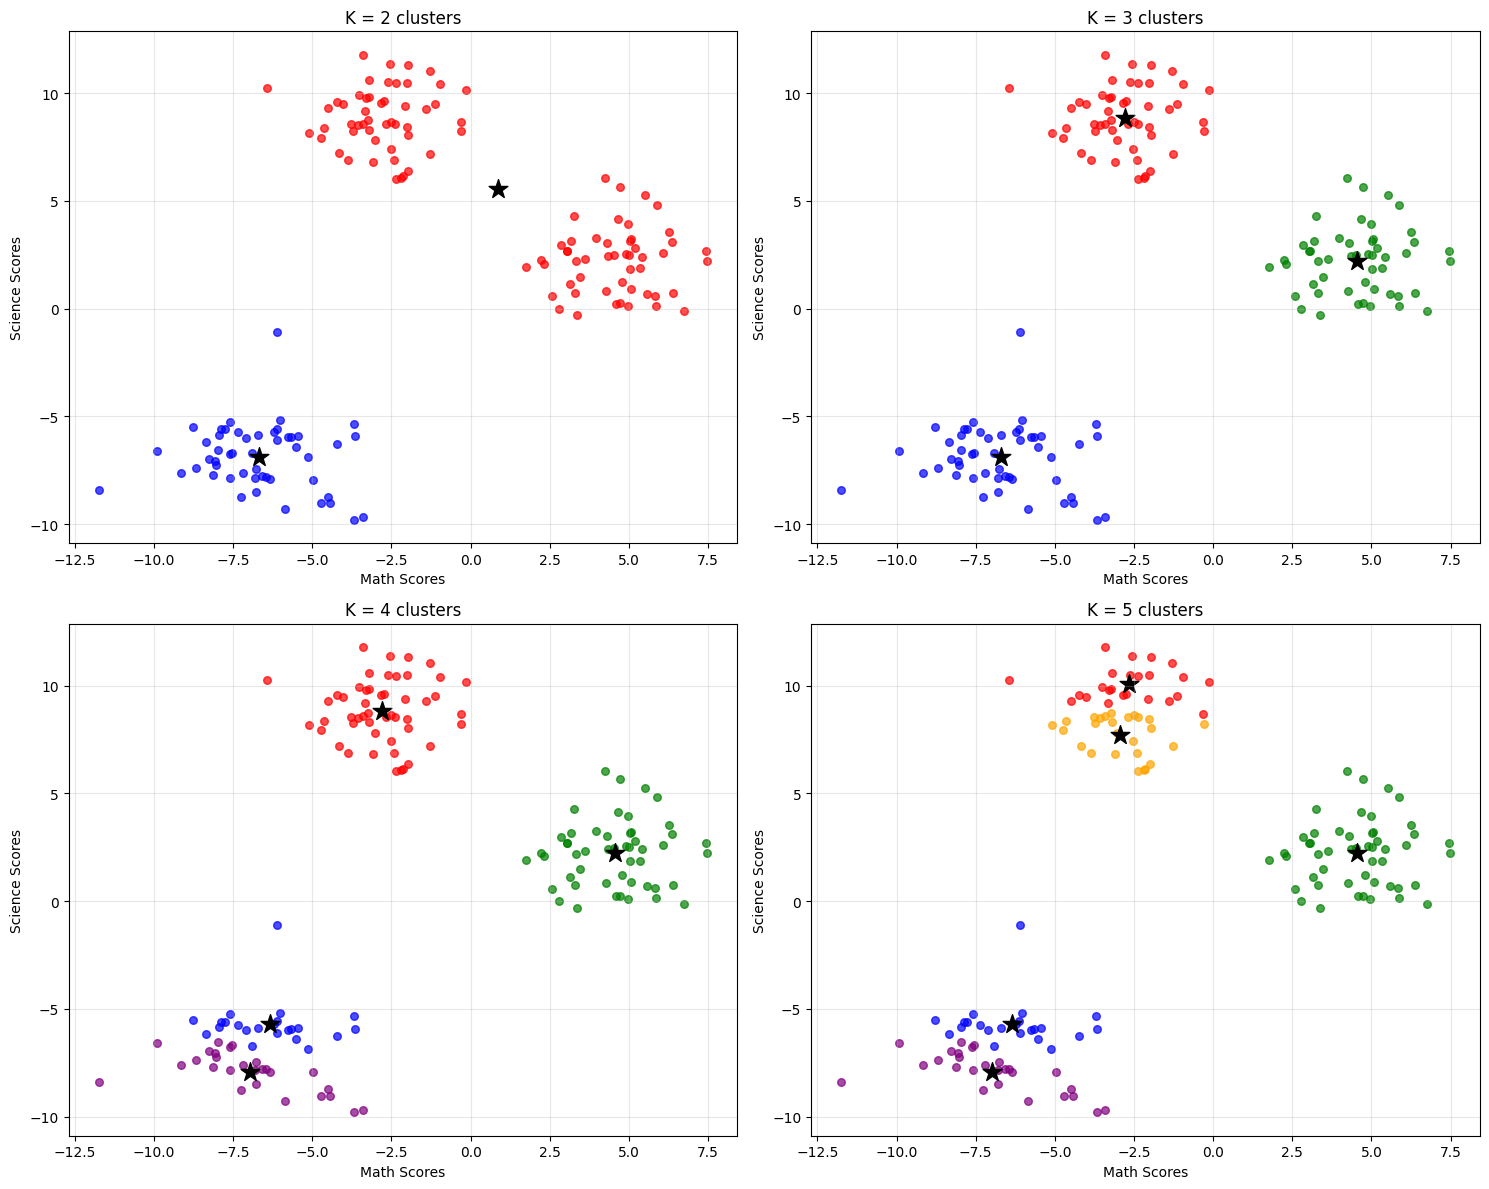

🤔 Which value of K looks best to you?
💡 Hint: Look for natural, well-separated groups!


In [5]:
# Test different values of K
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
k_values = [2, 3, 4, 5]

for i, k in enumerate(k_values):
    row = i // 2
    col = i % 2
    
    # Apply K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    centroids = kmeans.cluster_centers_
    
    # Plot
    colors = ['red', 'blue', 'green', 'purple', 'orange']
    for j in range(k):
        axes[row, col].scatter(X[labels == j, 0], X[labels == j, 1], 
                              c=colors[j], s=30, alpha=0.7)
    
    axes[row, col].scatter(centroids[:, 0], centroids[:, 1], 
                          c='black', marker='*', s=200)
    axes[row, col].set_title(f'K = {k} clusters')
    axes[row, col].set_xlabel('Math Scores')
    axes[row, col].set_ylabel('Science Scores')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("🤔 Which value of K looks best to you?")
print("💡 Hint: Look for natural, well-separated groups!")

## 📊 The Elbow Method: A Scientific Way to Choose K

Instead of guessing, we can use the **Elbow Method** to find the optimal number of clusters!

C:\Users\Secon\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


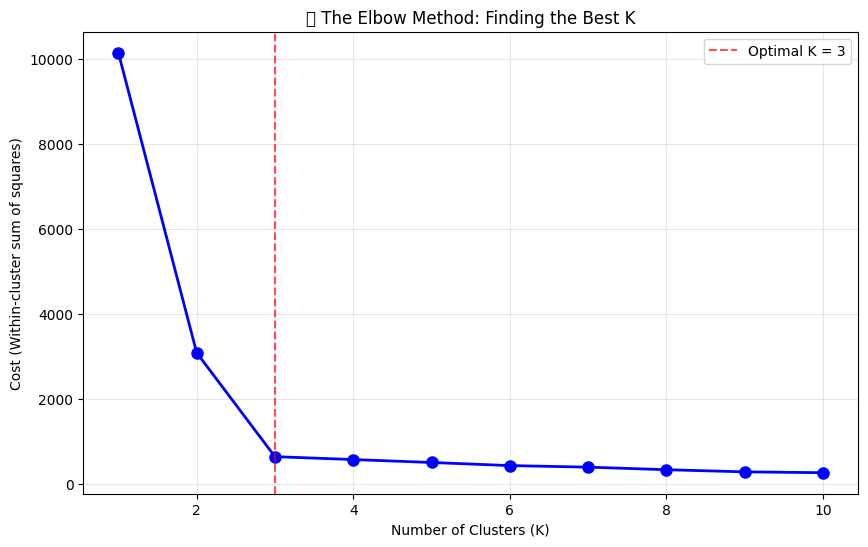

💡 The 'elbow' in the graph shows the optimal K!
📍 At K=3, we get a good balance between simplicity and accuracy.
📈 After K=3, adding more clusters doesn't improve much.


In [6]:
# Calculate the "cost" for different values of K
k_range = range(1, 11)
costs = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    costs.append(kmeans.inertia_)  # inertia = total distance from points to centroids

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, costs, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Cost (Within-cluster sum of squares)')
plt.title('🔍 The Elbow Method: Finding the Best K')
plt.grid(True, alpha=0.3)

# Highlight the "elbow"
plt.axvline(x=3, color='red', linestyle='--', alpha=0.7, label='Optimal K = 3')
plt.legend()
plt.show()

print("💡 The 'elbow' in the graph shows the optimal K!")
print("📍 At K=3, we get a good balance between simplicity and accuracy.")
print("📈 After K=3, adding more clusters doesn't improve much.")

## 📏 Step 5: Different Ways to Measure Distance

One of the most important concepts in K-Means is **distance**. But wait - there are different ways to measure distance between points! Let's explore this with a fun example.

### 🏙️ The City Navigation Problem
Imagine you're in a city and want to get from your house to your friend's house. There are different ways to measure the "distance":

1. **Euclidean Distance** 🚁 - "As the crow flies" (straight line)
2. **Manhattan Distance** 🚶 - "City block" distance (like walking on city streets)
3. **Chebyshev Distance** 👑 - "King's move" distance (like how a king moves in chess)

Let's see how these different distance measures affect our clustering results!

C:\Users\Secon\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Secon\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


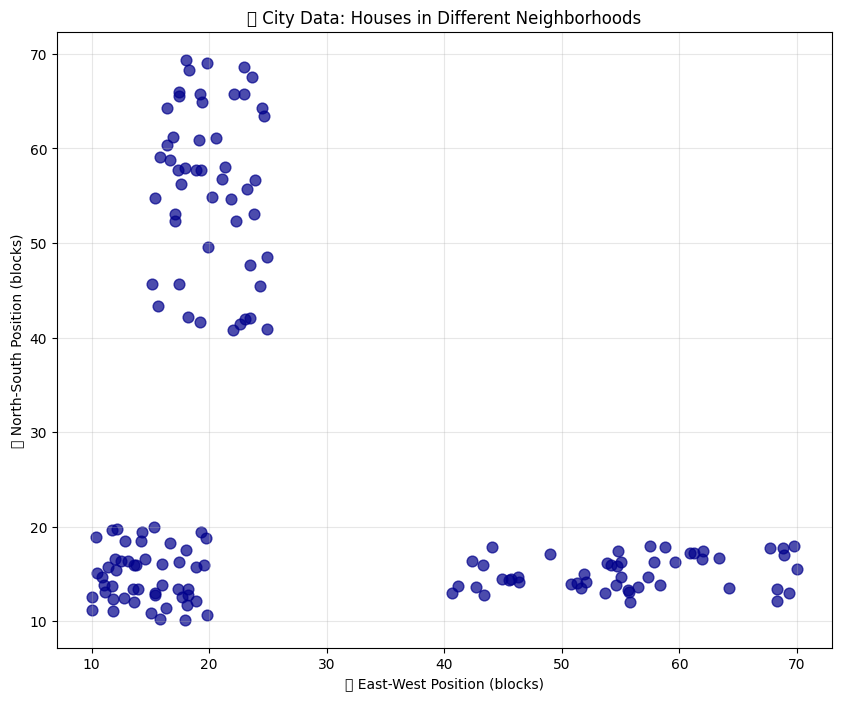

🏠 We have houses scattered across 3 different neighborhoods
📏 Let's see how different distance metrics group them!


In [7]:
# Create special data to demonstrate different distance metrics
# Let's create data that looks like city blocks!

np.random.seed(100)

# Create data points that form rectangular/square patterns
# This will make the difference between distance metrics more visible
city_data = []

# Create 3 "neighborhoods" with different characteristics
# Neighborhood 1: Compact square
for _ in range(50):
    x = np.random.uniform(10, 20)
    y = np.random.uniform(10, 20)
    city_data.append([x, y])

# Neighborhood 2: Horizontal rectangle 
for _ in range(50):
    x = np.random.uniform(40, 70)
    y = np.random.uniform(12, 18)
    city_data.append([x, y])

# Neighborhood 3: Vertical rectangle
for _ in range(50):
    x = np.random.uniform(15, 25)
    y = np.random.uniform(40, 70)
    city_data.append([x, y])

city_data = np.array(city_data)

# Plot our city-like data
plt.figure(figsize=(10, 8))
plt.scatter(city_data[:, 0], city_data[:, 1], c='darkblue', s=60, alpha=0.7)
plt.xlabel('🗺️ East-West Position (blocks)')
plt.ylabel('🗺️ North-South Position (blocks)')
plt.title('🏙️ City Data: Houses in Different Neighborhoods')
plt.grid(True, alpha=0.3)
plt.show()

print("🏠 We have houses scattered across 3 different neighborhoods")
print("📏 Let's see how different distance metrics group them!")

### 📐 Understanding Different Distance Metrics

Let's visualize how different distance metrics work using two example points:

C:\Users\Secon\AppData\Local\Temp\ipykernel_15704\3087129538.py:48: UserWarning: Glyph 128641 (\N{HELICOPTER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Secon\AppData\Local\Temp\ipykernel_15704\3087129538.py:48: UserWarning: Glyph 128694 (\N{PEDESTRIAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Secon\AppData\Local\Temp\ipykernel_15704\3087129538.py:48: UserWarning: Glyph 128081 (\N{CROWN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Secon\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128641 (\N{HELICOPTER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Secon\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128694 (\N{PEDESTRIAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Secon\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabt

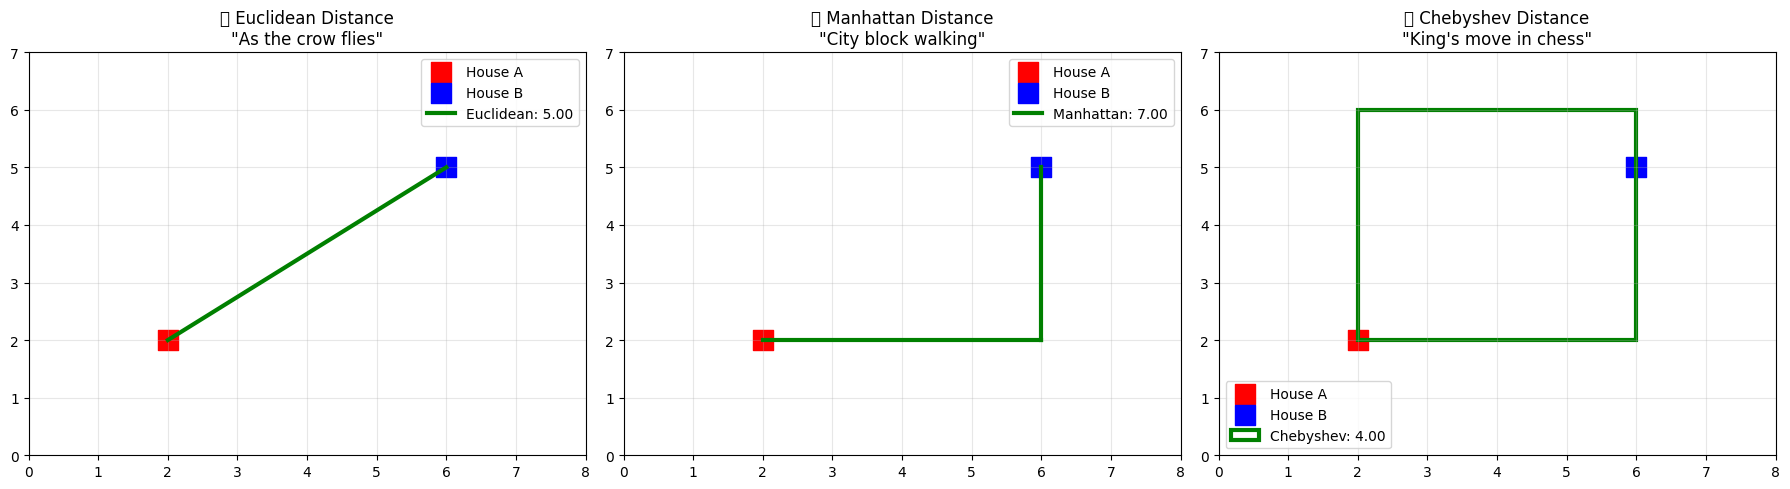

📏 Distance Comparison:
🚁 Euclidean (straight line): 5.00 blocks
🚶 Manhattan (city walking): 7.00 blocks
👑 Chebyshev (king's move): 4.00 blocks

💡 Notice how different metrics give different distance values!


In [8]:
# Let's visualize different distance metrics with two example points
point_A = np.array([2, 2])
point_B = np.array([6, 5])

# Calculate different distances
euclidean_dist = np.sqrt((point_B[0] - point_A[0])**2 + (point_B[1] - point_A[1])**2)
manhattan_dist = abs(point_B[0] - point_A[0]) + abs(point_B[1] - point_A[1])
chebyshev_dist = max(abs(point_B[0] - point_A[0]), abs(point_B[1] - point_A[1]))

# Create visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Euclidean Distance (straight line)
axes[0].scatter(*point_A, color='red', s=200, label='House A', marker='s')
axes[0].scatter(*point_B, color='blue', s=200, label='House B', marker='s')
axes[0].plot([point_A[0], point_B[0]], [point_A[1], point_B[1]], 'g-', linewidth=3, label=f'Euclidean: {euclidean_dist:.2f}')
axes[0].set_title('🚁 Euclidean Distance\n"As the crow flies"')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim(0, 8)
axes[0].set_ylim(0, 7)

# 2. Manhattan Distance (city blocks)
axes[1].scatter(*point_A, color='red', s=200, label='House A', marker='s')
axes[1].scatter(*point_B, color='blue', s=200, label='House B', marker='s')
# Draw the Manhattan path
axes[1].plot([point_A[0], point_B[0]], [point_A[1], point_A[1]], 'g-', linewidth=3)
axes[1].plot([point_B[0], point_B[0]], [point_A[1], point_B[1]], 'g-', linewidth=3, label=f'Manhattan: {manhattan_dist:.2f}')
axes[1].set_title('🚶 Manhattan Distance\n"City block walking"')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim(0, 8)
axes[1].set_ylim(0, 7)

# 3. Chebyshev Distance (king's move)
axes[2].scatter(*point_A, color='red', s=200, label='House A', marker='s')
axes[2].scatter(*point_B, color='blue', s=200, label='House B', marker='s')
# Draw a square showing the Chebyshev distance
square = plt.Rectangle((point_A[0], point_A[1]), chebyshev_dist, chebyshev_dist, 
                      fill=False, edgecolor='green', linewidth=3, label=f'Chebyshev: {chebyshev_dist:.2f}')
axes[2].add_patch(square)
axes[2].set_title('👑 Chebyshev Distance\n"King\'s move in chess"')
axes[2].legend()
axes[2].grid(True, alpha=0.3)
axes[2].set_xlim(0, 8)
axes[2].set_ylim(0, 7)

plt.tight_layout()
plt.show()

print("📏 Distance Comparison:")
print(f"🚁 Euclidean (straight line): {euclidean_dist:.2f} blocks")
print(f"🚶 Manhattan (city walking): {manhattan_dist:.2f} blocks") 
print(f"👑 Chebyshev (king's move): {chebyshev_dist:.2f} blocks")
print("\n💡 Notice how different metrics give different distance values!")

### 🔬 How Distance Metrics Affect Clustering

Now let's see how using different distance metrics changes our clustering results! We'll implement our own mini K-Means with different distance measures.

C:\Users\Secon\AppData\Local\Temp\ipykernel_15704\4194008791.py:78: UserWarning: Glyph 128641 (\N{HELICOPTER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Secon\AppData\Local\Temp\ipykernel_15704\4194008791.py:78: UserWarning: Glyph 128694 (\N{PEDESTRIAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Secon\AppData\Local\Temp\ipykernel_15704\4194008791.py:78: UserWarning: Glyph 128081 (\N{CROWN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


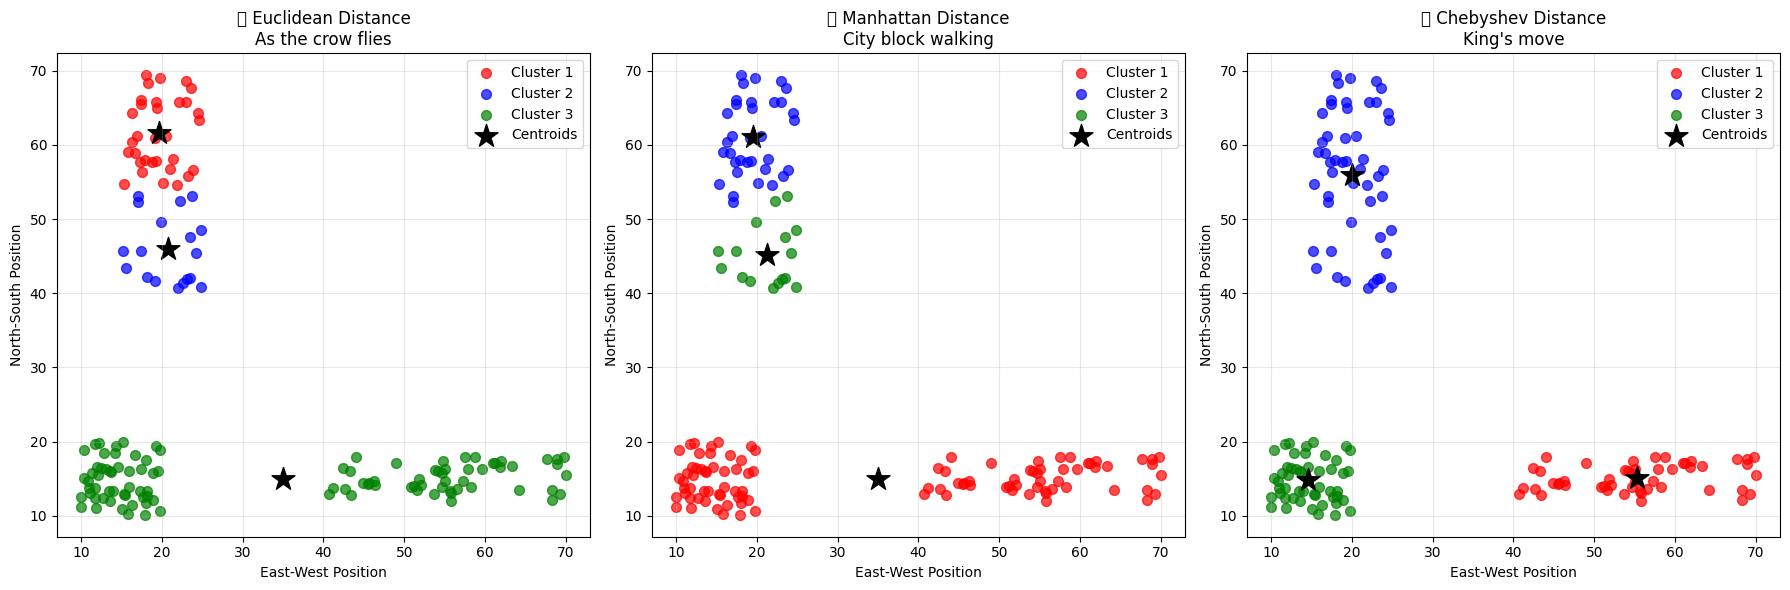

🔍 Observation: Notice how different distance metrics create different cluster boundaries!
📊 Each metric is better suited for different types of data patterns.


In [9]:
# Define different distance functions
def euclidean_distance(point1, point2):
    """Calculate Euclidean distance (straight line)"""
    return np.sqrt(np.sum((point1 - point2)**2))

def manhattan_distance(point1, point2):
    """Calculate Manhattan distance (city blocks)"""
    return np.sum(np.abs(point1 - point2))

def chebyshev_distance(point1, point2):
    """Calculate Chebyshev distance (king's move)"""
    return np.max(np.abs(point1 - point2))

# Simple K-Means implementation with custom distance metrics
def simple_kmeans(data, k, distance_func, max_iters=100):
    """Simple K-Means with custom distance function"""
    
    # Initialize random centroids
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    
    for iteration in range(max_iters):
        # Assign points to closest centroid
        labels = []
        for point in data:
            distances = [distance_func(point, centroid) for centroid in centroids]
            labels.append(np.argmin(distances))
        labels = np.array(labels)
        
        # Update centroids
        new_centroids = []
        for i in range(k):
            if np.sum(labels == i) > 0:  # Check if cluster has points
                new_centroids.append(np.mean(data[labels == i], axis=0))
            else:
                new_centroids.append(centroids[i])  # Keep old centroid if no points
        new_centroids = np.array(new_centroids)
        
        # Check for convergence
        if np.allclose(centroids, new_centroids, rtol=1e-4):
            break
            
        centroids = new_centroids
    
    return labels, centroids

# Apply K-Means with different distance metrics
k = 3
distance_functions = [
    (euclidean_distance, "🚁 Euclidean", "As the crow flies"),
    (manhattan_distance, "🚶 Manhattan", "City block walking"),
    (chebyshev_distance, "👑 Chebyshev", "King's move")
]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (dist_func, title, subtitle) in enumerate(distance_functions):
    # Apply clustering
    labels, centroids = simple_kmeans(city_data, k, dist_func)
    
    # Plot results
    colors = ['red', 'blue', 'green']
    for cluster in range(k):
        cluster_points = city_data[labels == cluster]
        if len(cluster_points) > 0:
            axes[i].scatter(cluster_points[:, 0], cluster_points[:, 1], 
                          c=colors[cluster], s=50, alpha=0.7, label=f'Cluster {cluster+1}')
    
    # Plot centroids
    axes[i].scatter(centroids[:, 0], centroids[:, 1], 
                   c='black', marker='*', s=300, label='Centroids')
    
    axes[i].set_title(f'{title} Distance\n{subtitle}')
    axes[i].set_xlabel('East-West Position')
    axes[i].set_ylabel('North-South Position')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("🔍 Observation: Notice how different distance metrics create different cluster boundaries!")
print("📊 Each metric is better suited for different types of data patterns.")

### 🤔 When Should You Use Each Distance Metric?

Different distance metrics are better for different types of data and problems:

**🚁 Euclidean Distance** - *Best for:*
- Physical measurements (height, weight, temperature)
- Coordinates and geographical data
- Most general-purpose applications
- When all features have similar scales and importance

**🚶 Manhattan Distance** - *Best for:*
- City navigation and grid-based problems
- High-dimensional data (prevents "curse of dimensionality")
- When features represent different units (price + quantity)
- Outlier-resistant clustering

**👑 Chebyshev Distance** - *Best for:*
- Gaming applications (chess, checkers)
- When you care about the maximum difference in any dimension
- Quality control (checking if all measurements are within tolerance)
- Time series analysis

Let's see a real example of when distance choice matters!

C:\Users\Secon\AppData\Local\Temp\ipykernel_15704\2443491212.py:54: UserWarning: Glyph 128641 (\N{HELICOPTER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Secon\AppData\Local\Temp\ipykernel_15704\2443491212.py:54: UserWarning: Glyph 128662 (\N{ONCOMING TAXI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Secon\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128662 (\N{ONCOMING TAXI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


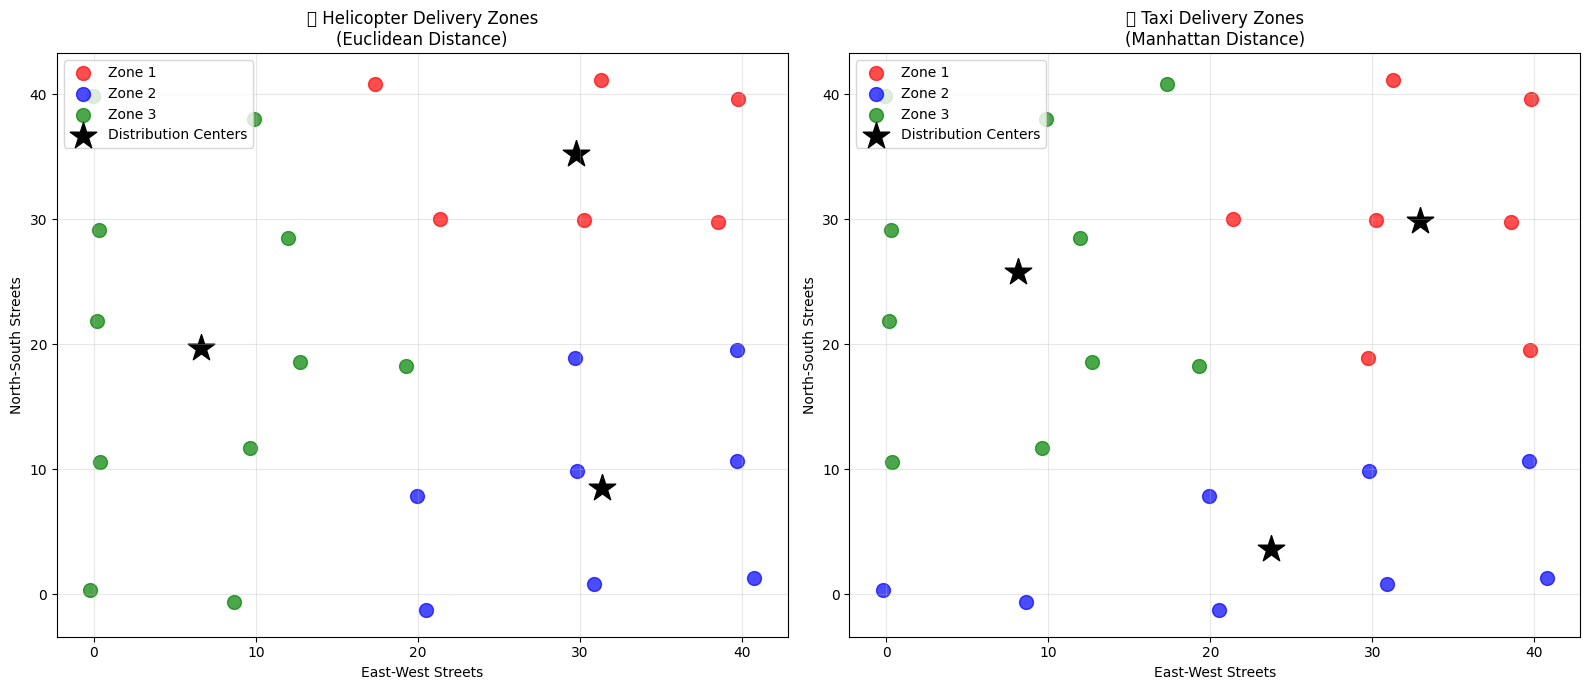

🔍 Key Insight:
🚁 Helicopter zones: More circular, based on straight-line distance
🚖 Taxi zones: More rectangular, based on street-grid distance
💡 The choice of distance metric should match your real-world constraints!


In [10]:
# 🚖 vs 🚁 Practical Example: Taxi vs Helicopter Delivery Service
# Let's say we're planning delivery routes in a city

# Create delivery locations in a grid-like city
np.random.seed(150)
delivery_locations = []

# Create locations along a city grid pattern
for i in range(5):
    for j in range(5):
        # Add some randomness around grid points
        x = i * 10 + np.random.normal(0, 1)
        y = j * 10 + np.random.normal(0, 1)
        delivery_locations.append([x, y])

delivery_locations = np.array(delivery_locations)

# Let's say we want to group deliveries into 3 zones
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Helicopter delivery (Euclidean distance) - can fly in straight lines
labels_helicopter, centroids_helicopter = simple_kmeans(delivery_locations, 3, euclidean_distance)
colors = ['red', 'blue', 'green']

for cluster in range(3):
    cluster_points = delivery_locations[labels_helicopter == cluster]
    ax1.scatter(cluster_points[:, 0], cluster_points[:, 1], 
               c=colors[cluster], s=100, alpha=0.7, label=f'Zone {cluster+1}')

ax1.scatter(centroids_helicopter[:, 0], centroids_helicopter[:, 1], 
           c='black', marker='*', s=400, label='Distribution Centers')
ax1.set_title('🚁 Helicopter Delivery Zones\n(Euclidean Distance)')
ax1.set_xlabel('East-West Streets')
ax1.set_ylabel('North-South Streets')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Taxi delivery (Manhattan distance) - must follow roads
labels_taxi, centroids_taxi = simple_kmeans(delivery_locations, 3, manhattan_distance)

for cluster in range(3):
    cluster_points = delivery_locations[labels_taxi == cluster]
    ax2.scatter(cluster_points[:, 0], cluster_points[:, 1], 
               c=colors[cluster], s=100, alpha=0.7, label=f'Zone {cluster+1}')

ax2.scatter(centroids_taxi[:, 0], centroids_taxi[:, 1], 
           c='black', marker='*', s=400, label='Distribution Centers')
ax2.set_title('🚖 Taxi Delivery Zones\n(Manhattan Distance)')
ax2.set_xlabel('East-West Streets')
ax2.set_ylabel('North-South Streets')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("🔍 Key Insight:")
print("🚁 Helicopter zones: More circular, based on straight-line distance")
print("🚖 Taxi zones: More rectangular, based on street-grid distance")
print("💡 The choice of distance metric should match your real-world constraints!")

### 📊 Distance Metrics Summary

| Distance Type | Formula | Best For | Real-World Example |
|---------------|---------|----------|-------------------|
| 🚁 **Euclidean** | √[(x₂-x₁)² + (y₂-y₁)²] | Physical measurements, general use | GPS navigation, measuring room temperature |
| 🚶 **Manhattan** | \|x₂-x₁\| + \|y₂-y₁\| | Grid-based, high dimensions | Taxi routes, warehouse logistics |
| 👑 **Chebyshev** | max(\|x₂-x₁\|, \|y₂-y₁\|) | Gaming, max-difference problems | Chess moves, quality control |

**💡 Key Takeaway**: The "best" distance metric depends on your specific problem and data characteristics!

---

---

# 🌟 REAL-WORLD APPLICATION: Customer Segmentation

Now let's see how K-Means is used in the real world! Imagine you work for an online store and want to understand your customers better.

## 🛍️ The Business Problem
You have data about your customers:
- How much they spend annually
- How often they shop

**Goal**: Group customers to create targeted marketing campaigns!

C:\Users\Secon\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Secon\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Secon\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


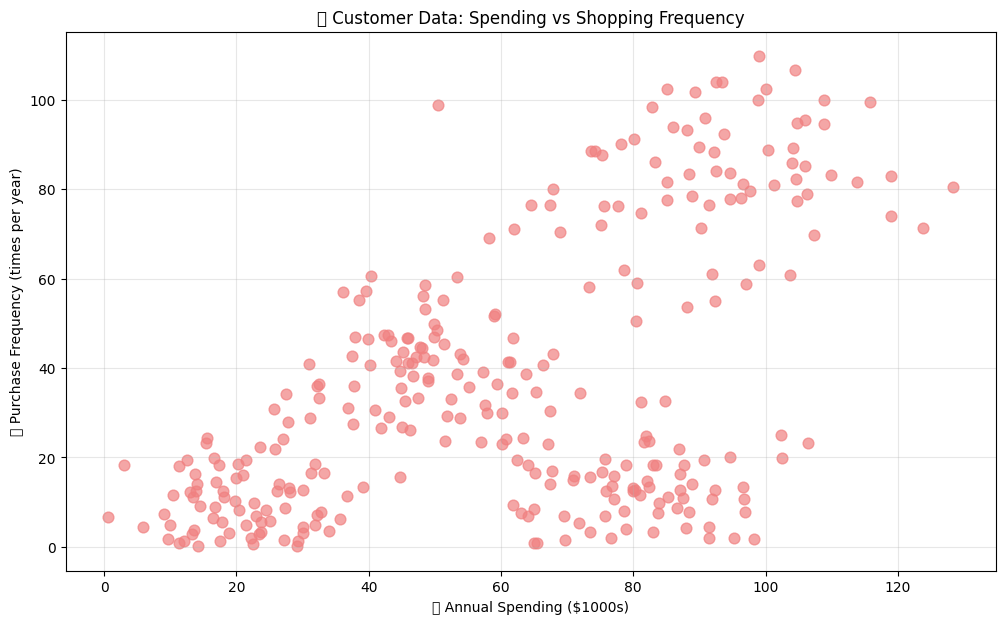

🏪 We have 300 customers to analyze
📊 Let's find different customer segments!

📋 Sample customer data:
   Annual_Spending  Purchase_Frequency  Customer_ID
0        78.857570           18.344202            1
1        98.830283           99.997861            2
2        23.409173            2.843278            3
3        21.436396            4.895806            4
4        80.355715           50.503505            5
5        59.043062           51.999876            6
6        58.889929           51.610684            7
7        86.018316           93.943767            8
8        32.262286           35.924874            9
9        79.924313           12.520052           10


In [11]:
# Create realistic customer data
np.random.seed(123)

# Generate customer data
n_customers = 300

# Create 4 different customer types
customer_data, true_segments = make_blobs(
    n_samples=n_customers,
    centers=[(20, 10), (80, 15), (50, 40), (90, 80)],  # (Annual spending in $1000s, Purchase frequency)
    cluster_std=[8, 12, 10, 15],
    random_state=123
)

# Make sure values are realistic (positive)
customer_data[:, 0] = np.abs(customer_data[:, 0])  # Annual spending
customer_data[:, 1] = np.abs(customer_data[:, 1])  # Purchase frequency

# Create DataFrame
customers_df = pd.DataFrame({
    'Annual_Spending': customer_data[:, 0],
    'Purchase_Frequency': customer_data[:, 1],
    'Customer_ID': range(1, n_customers + 1)
})

# Plot the customer data
plt.figure(figsize=(12, 7))
plt.scatter(customers_df['Annual_Spending'], customers_df['Purchase_Frequency'], 
           c='lightcoral', s=60, alpha=0.7)
plt.xlabel('💰 Annual Spending ($1000s)')
plt.ylabel('🛒 Purchase Frequency (times per year)')
plt.title('🛍️ Customer Data: Spending vs Shopping Frequency')
plt.grid(True, alpha=0.3)
plt.show()

print(f"🏪 We have {len(customers_df)} customers to analyze")
print("📊 Let's find different customer segments!")

# Show sample data
print("\n📋 Sample customer data:")
print(customers_df.head(10))

## 🎯 Applying K-Means to Customer Data

C:\Users\Secon\AppData\Local\Temp\ipykernel_15704\2515451820.py:31: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Secon\AppData\Local\Temp\ipykernel_15704\2515451820.py:31: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Secon\AppData\Local\Temp\ipykernel_15704\2515451820.py:31: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Secon\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Secon\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Secon\AppData\Roaming\Python\Python312\site-packages\IPy

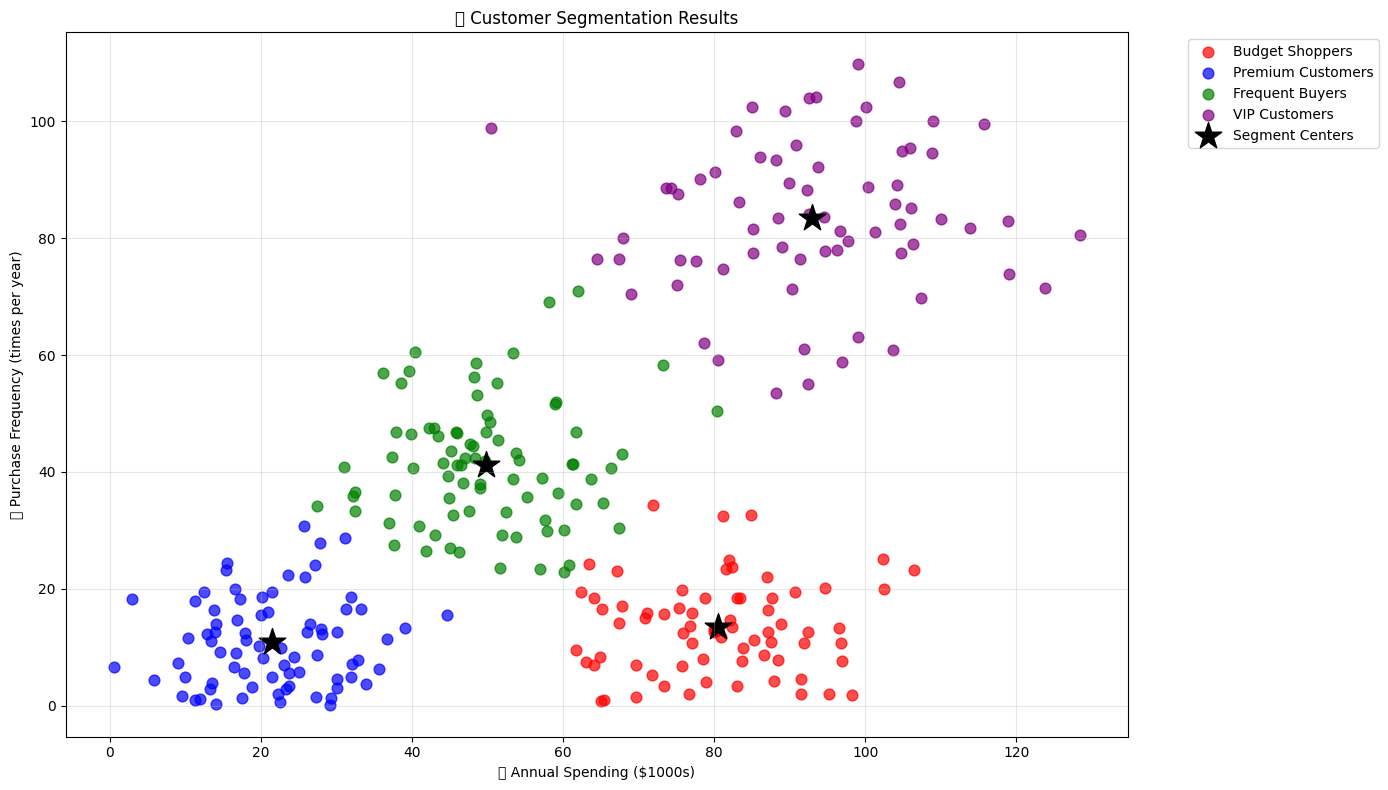

In [12]:
# Apply K-Means to customer data
k_customers = 4  # Let's try 4 customer segments

customer_features = customers_df[['Annual_Spending', 'Purchase_Frequency']].values
kmeans_customers = KMeans(n_clusters=k_customers, random_state=42)
customer_labels = kmeans_customers.fit_predict(customer_features)
customer_centroids = kmeans_customers.cluster_centers_

# Add cluster labels to our DataFrame
customers_df['Segment'] = customer_labels

# Plot the results
plt.figure(figsize=(14, 8))
colors = ['red', 'blue', 'green', 'purple']
segment_names = ['Budget Shoppers', 'Premium Customers', 'Frequent Buyers', 'VIP Customers']

for i in range(k_customers):
    cluster_data = customer_features[customer_labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], 
               c=colors[i], s=60, alpha=0.7, label=segment_names[i])

# Plot centroids
plt.scatter(customer_centroids[:, 0], customer_centroids[:, 1], 
           c='black', marker='*', s=400, label='Segment Centers')

plt.xlabel('💰 Annual Spending ($1000s)')
plt.ylabel('🛒 Purchase Frequency (times per year)')
plt.title('🎯 Customer Segmentation Results')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 📊 Understanding Our Customer Segments

In [13]:
# Analyze each customer segment
print("🛍️ CUSTOMER SEGMENT ANALYSIS")
print("=" * 60)

segment_names = ['Budget Shoppers 💝', 'Premium Customers 💎', 'Frequent Buyers 🛒', 'VIP Customers 👑']

for i in range(k_customers):
    segment_data = customers_df[customers_df['Segment'] == i]
    
    avg_spending = segment_data['Annual_Spending'].mean()
    avg_frequency = segment_data['Purchase_Frequency'].mean()
    customer_count = len(segment_data)
    percentage = (customer_count / len(customers_df)) * 100
    
    print(f"\n{segment_names[i]}")
    print(f"   👥 Customers: {customer_count} ({percentage:.1f}% of total)")
    print(f"   💰 Average Spending: ${avg_spending:.1f}k per year")
    print(f"   🛒 Shopping Frequency: {avg_frequency:.1f} times per year")
    
    # Marketing recommendations
    if avg_spending < 30 and avg_frequency < 20:
        print(f"   📝 Strategy: Discount offers and loyalty programs")
    elif avg_spending > 70 and avg_frequency > 50:
        print(f"   📝 Strategy: Exclusive products and premium services")
    elif avg_frequency > 30:
        print(f"   📝 Strategy: Bulk purchase discounts and subscriptions")
    else:
        print(f"   📝 Strategy: Quality products and personalized recommendations")

print("\n" + "=" * 60)
print("💡 With these insights, you can create targeted marketing campaigns!")

🛍️ CUSTOMER SEGMENT ANALYSIS

Budget Shoppers 💝
   👥 Customers: 72 (24.0% of total)
   💰 Average Spending: $80.5k per year
   🛒 Shopping Frequency: 13.4 times per year
   📝 Strategy: Quality products and personalized recommendations

Premium Customers 💎
   👥 Customers: 76 (25.3% of total)
   💰 Average Spending: $21.5k per year
   🛒 Shopping Frequency: 10.9 times per year
   📝 Strategy: Discount offers and loyalty programs

Frequent Buyers 🛒
   👥 Customers: 82 (27.3% of total)
   💰 Average Spending: $49.8k per year
   🛒 Shopping Frequency: 41.3 times per year
   📝 Strategy: Bulk purchase discounts and subscriptions

VIP Customers 👑
   👥 Customers: 70 (23.3% of total)
   💰 Average Spending: $93.0k per year
   🛒 Shopping Frequency: 83.4 times per year
   📝 Strategy: Exclusive products and premium services

💡 With these insights, you can create targeted marketing campaigns!


## 📈 Visualizing Segment Characteristics

C:\Users\Secon\AppData\Local\Temp\ipykernel_15704\1712819109.py:51: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Secon\AppData\Local\Temp\ipykernel_15704\1712819109.py:51: UserWarning: Glyph 128157 (\N{HEART WITH RIBBON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Secon\AppData\Local\Temp\ipykernel_15704\1712819109.py:51: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Secon\AppData\Local\Temp\ipykernel_15704\1712819109.py:51: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Secon\AppData\Local\Temp\ipykernel_15704\1712819109.py:51: UserWarning: Glyph 128081 (\N{CROWN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Secon\AppData\Local\Temp\ipykernel_15704\1712819109.py:51: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Us

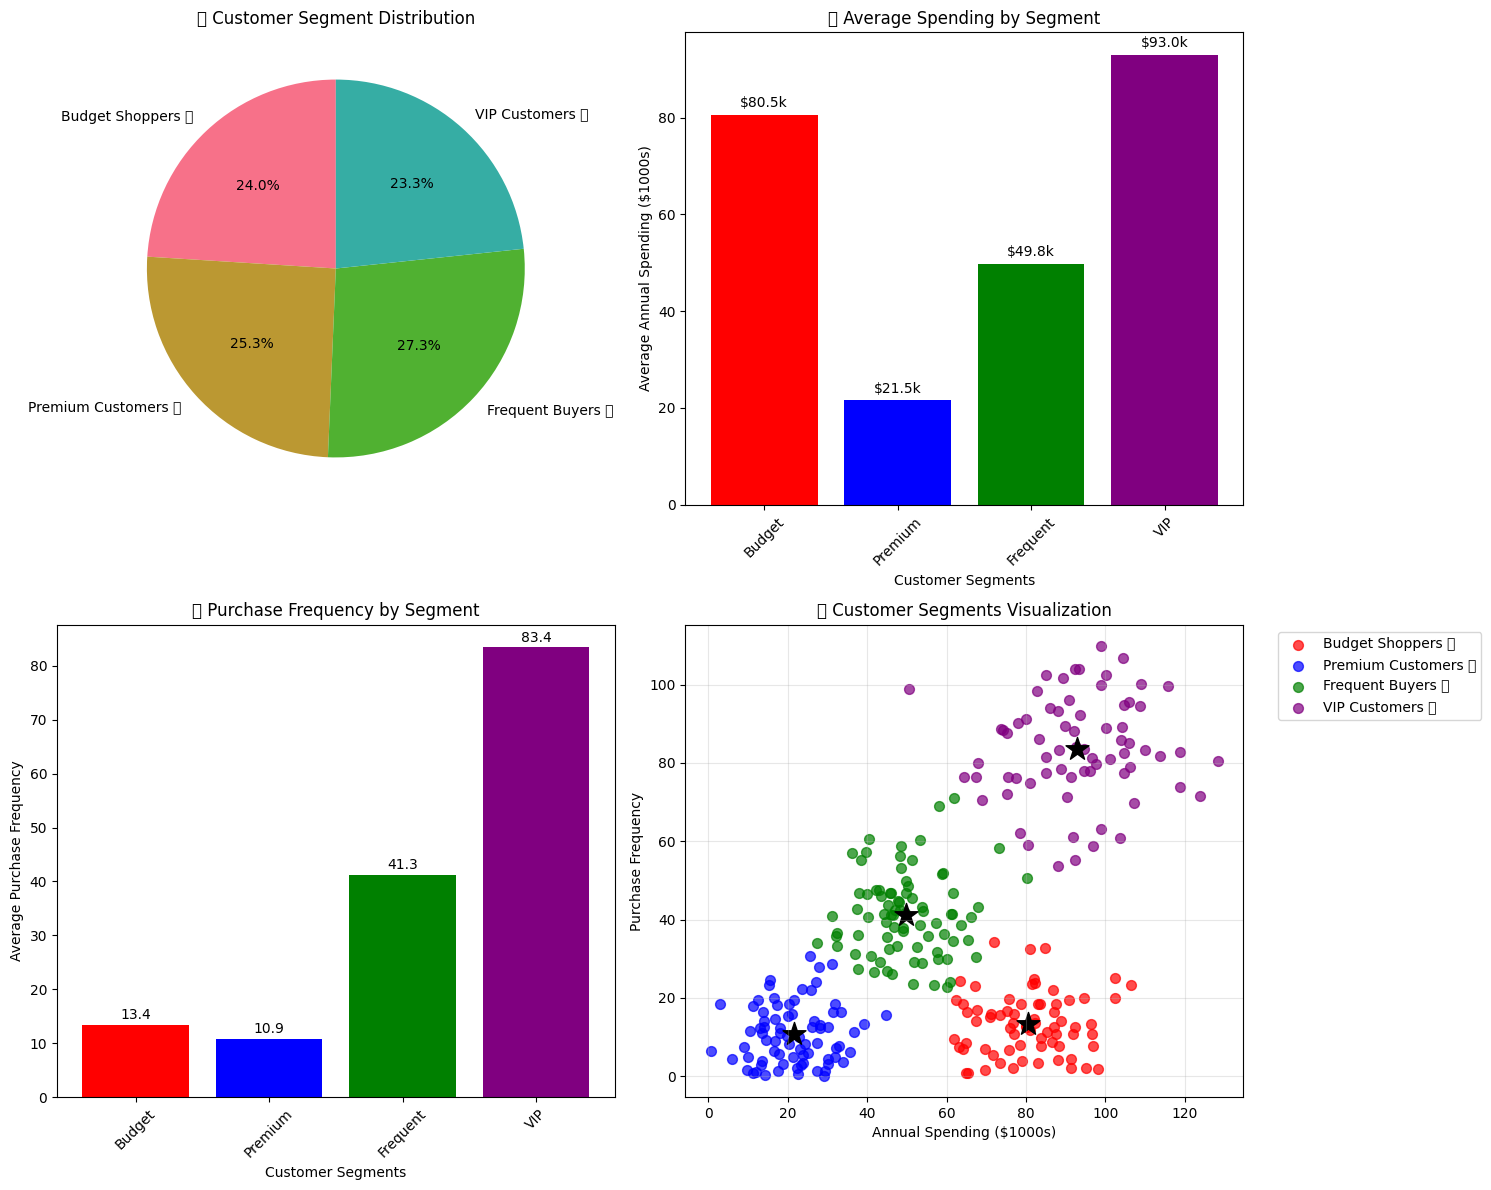

📊 Now you can see clear patterns in your customer base!
🎯 Each segment needs a different marketing approach.


In [14]:
# Create summary visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Segment sizes (pie chart)
segment_counts = customers_df['Segment'].value_counts().sort_index()
ax1.pie(segment_counts.values, labels=segment_names, autopct='%1.1f%%', startangle=90)
ax1.set_title('🥧 Customer Segment Distribution')

# 2. Average spending by segment
avg_spending = customers_df.groupby('Segment')['Annual_Spending'].mean()
bars1 = ax2.bar(range(len(segment_names)), avg_spending.values, color=colors)
ax2.set_xlabel('Customer Segments')
ax2.set_ylabel('Average Annual Spending ($1000s)')
ax2.set_title('💰 Average Spending by Segment')
ax2.set_xticks(range(len(segment_names)))
ax2.set_xticklabels([name.split()[0] for name in segment_names], rotation=45)

# Add value labels on bars
for bar, value in zip(bars1, avg_spending.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'${value:.1f}k', ha='center', va='bottom')

# 3. Average frequency by segment
avg_frequency = customers_df.groupby('Segment')['Purchase_Frequency'].mean()
bars2 = ax3.bar(range(len(segment_names)), avg_frequency.values, color=colors)
ax3.set_xlabel('Customer Segments')
ax3.set_ylabel('Average Purchase Frequency')
ax3.set_title('🛒 Purchase Frequency by Segment')
ax3.set_xticks(range(len(segment_names)))
ax3.set_xticklabels([name.split()[0] for name in segment_names], rotation=45)

# Add value labels on bars
for bar, value in zip(bars2, avg_frequency.values):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{value:.1f}', ha='center', va='bottom')

# 4. Scatter plot with segment labels
for i in range(k_customers):
    cluster_data = customers_df[customers_df['Segment'] == i]
    ax4.scatter(cluster_data['Annual_Spending'], cluster_data['Purchase_Frequency'], 
               c=colors[i], s=50, alpha=0.7, label=segment_names[i])

ax4.scatter(customer_centroids[:, 0], customer_centroids[:, 1], 
           c='black', marker='*', s=300)
ax4.set_xlabel('Annual Spending ($1000s)')
ax4.set_ylabel('Purchase Frequency')
ax4.set_title('🎯 Customer Segments Visualization')
ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Now you can see clear patterns in your customer base!")
print("🎯 Each segment needs a different marketing approach.")

---

# 🎓 Summary: What We Learned

Congratulations! You've just learned one of the most important algorithms in Machine Learning! 🎉

## 🧠 Key Takeaways

### 📚 **What is K-Means?**
- A clustering algorithm that groups similar data points together
- Works by finding cluster centers (centroids) and assigning points to the nearest center
- Iteratively improves the clusters until they stabilize

### 🔧 **How it Works:**
1. Choose the number of clusters (K)
2. Place K random centroids
3. Assign each point to nearest centroid
4. Move centroids to center of their assigned points
5. Repeat until convergence

### 🎯 **Choosing the Right K:**
- Use the Elbow Method to find optimal number of clusters
- Look for the "elbow" in the cost vs K graph
- Balance between simplicity and accuracy

### 🌟 **Real-World Applications:**
- **Customer Segmentation**: Group customers for targeted marketing
- **Image Compression**: Reduce colors in images
- **Market Research**: Identify consumer groups
- **Social Media**: Recommend friends or content
- **Healthcare**: Group patients with similar symptoms

---

## 🚀 What's Next?

Now that you understand K-Means, you can explore:
- Other clustering algorithms (DBSCAN, Hierarchical Clustering)
- Supervised learning (when you have labels)
- Deep learning and neural networks

## 💡 Practice Ideas
Try applying K-Means to:
- Your music playlist (group songs by tempo, genre)
- Sports data (group players by performance)
- Academic performance (group subjects by difficulty)

---

**Remember**: Machine Learning is all about finding patterns in data. K-Means is your first step into this exciting world! 🌟

Keep exploring, keep learning, and most importantly - have fun with data! 📊✨

## 🤔 Challenge Questions

Test your understanding:

1. **Why might K-Means struggle with non-circular clusters?**
2. **What happens if you choose K=1? K=number of data points?**
3. **How would you use K-Means to organize your photo collection?**
4. **What other business problems could benefit from customer segmentation?**

Think about these questions and try to experiment with the code above! 🧪